# Data Analysis of Tuen Mun

In [3]:
# importing the needed libraries
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Importing Tuen Mun data

In [4]:
# reading the csv file for Tuen Mun months
Tuen_Mun = pd.read_csv('Tuen_Mun_Raw_Data.csv')
Tuen_Mun

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,7742,Tuen Mun,co,790.0,µg/m³,2024-01-01T01:00:00+00:00,2024-01-01T09:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
1,7742,Tuen Mun,co,700.0,µg/m³,2024-01-01T02:00:00+00:00,2024-01-01T10:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
2,7742,Tuen Mun,co,740.0,µg/m³,2024-01-01T03:00:00+00:00,2024-01-01T11:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
3,7742,Tuen Mun,co,770.0,µg/m³,2024-01-01T04:00:00+00:00,2024-01-01T12:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
4,7742,Tuen Mun,co,790.0,µg/m³,2024-01-01T05:00:00+00:00,2024-01-01T13:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15050,7742,Tuen Mun,pm25,8.1,µg/m³,2024-06-30T20:00:00+00:00,2024-07-01T04:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
15051,7742,Tuen Mun,pm25,11.0,µg/m³,2024-06-30T21:00:00+00:00,2024-07-01T05:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
15052,7742,Tuen Mun,pm25,6.0,µg/m³,2024-06-30T22:00:00+00:00,2024-07-01T06:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong
15053,7742,Tuen Mun,pm25,5.0,µg/m³,2024-06-30T23:00:00+00:00,2024-07-01T07:00:00+08:00,Asia/Hong_Kong,22.391111,113.976667,NaN,NaN,NaN,Unknown Governmental Organization,Hong Kong


## Describing the data.

In [5]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{Tuen_Mun.shape}')

# showing the information about the dataset.
Tuen_Mun.info()

The Tuen Mun dataset is made up of(15055, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15055 entries, 0 to 15054
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    15055 non-null  int64  
 1   location_name  15055 non-null  object 
 2   parameter      15055 non-null  object 
 3   value          15055 non-null  float64
 4   unit           15055 non-null  object 
 5   datetimeUtc    15055 non-null  object 
 6   datetimeLocal  15055 non-null  object 
 7   timezone       15055 non-null  object 
 8   latitude       15055 non-null  float64
 9   longitude      15055 non-null  float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     15055 non-null  object 
 14  provider       15055 non-null  object 
dtypes: float64(6), int64(1), object(8)
memory usage: 1.7+ MB


## Data Cleaning
This process will involve the following steps:
* Dropping unneccesary columns.
* Handling missing values.
* Removing duplicates.
* Concerting datetimeLocal and datetimeUtc to a pandas datetime
* Setting datetimeLocal and datetimeUtc as index
* Creating a pivot table for the with the pollutants as the column and the datetimeUtc as index

In [6]:
# dropping unnecessary columns
"""
This function drops the unnecessary columns in the dataset
"""
def clean_data(Tuen_Mun):
    # Drop column: 'location_id'
    Tuen_Mun = Tuen_Mun.drop(columns=['location_id'])
    Tuen_Mun = Tuen_Mun.drop(columns=['latitude'])
    Tuen_Mun = Tuen_Mun.drop(columns=['longitude'])
    Tuen_Mun = Tuen_Mun.drop(columns=['country_iso'])
    Tuen_Mun = Tuen_Mun.drop(columns=['isMobile'])
    Tuen_Mun = Tuen_Mun.drop(columns=['isMonitor'])
    Tuen_Mun = Tuen_Mun.drop(columns=['owner_name'])
    Tuen_Mun = Tuen_Mun.drop(columns=['provider'])
    return Tuen_Mun

Tuen_Mun_cleaned = clean_data(Tuen_Mun.copy())

# checking for missing values
missing = Tuen_Mun_cleaned.isnull().sum()
print(f'The number of missing values are: {missing}')

# checking for duplicate values.
duplicate = Tuen_Mun_cleaned.duplicated().sum()
print(f'The number of duplicate values are: {duplicate}')

# converting datetimeLocal and datetimeUtc to pandas datetime
Tuen_Mun_cleaned['datetimeUtc'] = pd.to_datetime(Tuen_Mun_cleaned['datetimeUtc'], utc=True)
Tuen_Mun_cleaned['datetimeLocal'] = pd.to_datetime(Tuen_Mun_cleaned['datetimeLocal'])

# setting both datetimeLocal and Utc as index
Tuen_Mun_cleaned.set_index(Tuen_Mun_cleaned['datetimeUtc'])
Tuen_Mun_cleaned.set_index(Tuen_Mun_cleaned['datetimeLocal'])

# displaying the first 10 observations
Tuen_Mun_cleaned.head(10)

The number of missing values are: location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
timezone         0
dtype: int64
The number of duplicate values are: 0


,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone
0,Tuen Mun,co,790.0,µg/m³,2024-01-01 01:00:00+00:00,2024-01-01 09:00:00+08:00,Asia/Hong_Kong
1,Tuen Mun,co,700.0,µg/m³,2024-01-01 02:00:00+00:00,2024-01-01 10:00:00+08:00,Asia/Hong_Kong
2,Tuen Mun,co,740.0,µg/m³,2024-01-01 03:00:00+00:00,2024-01-01 11:00:00+08:00,Asia/Hong_Kong
3,Tuen Mun,co,770.0,µg/m³,2024-01-01 04:00:00+00:00,2024-01-01 12:00:00+08:00,Asia/Hong_Kong
4,Tuen Mun,co,790.0,µg/m³,2024-01-01 05:00:00+00:00,2024-01-01 13:00:00+08:00,Asia/Hong_Kong
5,Tuen Mun,co,770.0,µg/m³,2024-01-01 06:00:00+00:00,2024-01-01 14:00:00+08:00,Asia/Hong_Kong
6,Tuen Mun,co,750.0,µg/m³,2024-01-01 07:00:00+00:00,2024-01-01 15:00:00+08:00,Asia/Hong_Kong
7,Tuen Mun,co,760.0,µg/m³,2024-01-01 08:00:00+00:00,2024-01-01 16:00:00+08:00,Asia/Hong_Kong
8,Tuen Mun,co,770.0,µg/m³,2024-01-01 09:00:00+00:00,2024-01-01 17:00:00+08:00,Asia/Hong_Kong
9,Tuen Mun,co,780.0,µg/m³,2024-01-01 10:00:00+00:00,2024-01-01 18:00:00+08:00,Asia/Hong_Kong


In [7]:
# creating a pivot table
Tuen_Mun_pivot = Tuen_Mun_cleaned.pivot_table(
    values='value',
    index=['datetimeLocal', 'datetimeUtc'],
    columns='parameter'
)
# resetting the index for readability
Tuen_Mun_pivot.reset_index(inplace=True)

# filling the missing value with 0
Tuen_Mun_pivot = Tuen_Mun_pivot.fillna(0)

# displaying the first 10 obs.
Tuen_Mun_pivot.head(10)

parameter,datetimeLocal,datetimeUtc,co,o3,pm10,pm25
0,2024-01-01 09:00:00+08:00,2024-01-01 01:00:00+00:00,790.0,85.0,59.0,40.0
1,2024-01-01 10:00:00+08:00,2024-01-01 02:00:00+00:00,700.0,100.0,65.0,44.0
2,2024-01-01 11:00:00+08:00,2024-01-01 03:00:00+00:00,740.0,98.0,64.0,45.0
3,2024-01-01 12:00:00+08:00,2024-01-01 04:00:00+00:00,770.0,120.0,73.0,47.0
4,2024-01-01 13:00:00+08:00,2024-01-01 05:00:00+00:00,790.0,130.0,74.0,52.0
5,2024-01-01 14:00:00+08:00,2024-01-01 06:00:00+00:00,770.0,140.0,71.0,44.0
6,2024-01-01 15:00:00+08:00,2024-01-01 07:00:00+00:00,750.0,150.0,75.0,48.0
7,2024-01-01 16:00:00+08:00,2024-01-01 08:00:00+00:00,760.0,160.0,80.0,50.0
8,2024-01-01 17:00:00+08:00,2024-01-01 09:00:00+00:00,770.0,150.0,79.0,48.0
9,2024-01-01 18:00:00+08:00,2024-01-01 10:00:00+00:00,780.0,140.0,82.0,50.0


## Descriptive Statistics
* This will focus on the basic descriptive statistics for the pollutants.
This will include the mean, mode, median, maximum value and the minimum value as well as the quartiles

In [8]:
# describing the Tuen_Mun_pivot
desc = [Tuen_Mun_pivot['co'].describe(),Tuen_Mun_pivot['o3'].describe(),Tuen_Mun_pivot['pm10'].describe(),Tuen_Mun_pivot['pm25'].describe()]
desc = pd.DataFrame(desc)
print("The descriptive statistics for the pollutants is:", '\n', desc)

The descriptive statistics for the pollutants is: 
        count        mean         std  min    25%    50%    75%     max
co    3835.0  654.071186  153.226803  0.0  570.0  660.0  750.0  1000.0
o3    3835.0   45.102947   36.194111  0.0   19.0   36.0   62.0   330.0
pm10  3835.0   34.209987   20.317326  0.0   20.0   30.0   44.0   180.0
pm25  3835.0   20.150456   12.551287  0.0   11.0   18.0   27.0   110.0


## Calculating The Air Quality Index For Each Parameter and the Total AQI
The AQI is calculated based on air pollutant concentrations over a specific averaging period (usually 24 hours). These concentrations are obtained from air monitors or models.
The Air Quality Index (AQI) provides a numerical value that reflects the concentration of air pollutants in the ambient air. These pollutants include things like particulate matter (PM2.5 and PM10), ozone (O3), and carbon monoxide (CO).

In [9]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 42.0, 0, 50), (42.1, 84.0, 51, 100), (84.1, 126.0, 101, 150), (126.1, 168.0, 151, 200), (168.1, 210.0, 201, 300)],
    'pm10': [(0.0, 54.0, 0, 50), (55.1, 154.0, 51, 100), (155.0, 254.0, 101, 150), (255.0, 354.0, 151, 200), (355.0, 424.0, 201, 300)],
    'o3': [(0.0, 26.67, 0, 50), (26.68, 53.33, 51, 100), (53.34, 80.0, 101, 150), (80.01, 106.67, 151, 200), (106.68, 133.33, 201, 300), (133.34, 160.0, 301, 500)],
    'co': [(0.0, 138.3, 0, 50), (138.4, 276.6, 51, 100), (276.7, 414.9, 101, 150), (415.0, 553.2, 151, 200), (553.3, 691.5, 201, 300), (691.6, 830.0, 301, 500)]
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4368, freq='h'),
    'o3': np.random.uniform(0, 0.2, 4368),
    'co': np.random.uniform(0, 15, 4368),
    'pm25': np.random.uniform(0, 250, 4368),
    'pm10': np.random.uniform(0, 430, 4368)
}
Tuen_aqi = pd.DataFrame(data)

# Calculate AQI for each pollutant
Tuen_aqi['AQI_o3'] = Tuen_aqi['o3'].apply(lambda x: calculate_aqi(x, breakpoints['o3']))
Tuen_aqi['AQI_co'] = Tuen_aqi['co'].apply(lambda x: calculate_aqi(x, breakpoints['co']))
Tuen_aqi['AQI_pm25'] = Tuen_aqi['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))
Tuen_aqi['AQI_pm10'] = Tuen_aqi['pm10'].apply(lambda x: calculate_aqi(x, breakpoints['pm10']))

# Calculate overall AQI as the maximum of individual AQIs
Tuen_aqi['AQI'] = Tuen_aqi[['AQI_o3', 'AQI_co', 'AQI_pm25', 'AQI_pm10']].max(axis=1)

# filling the missing values with the mean
Tuen_aqi.fillna(value=Tuen_aqi.mean())

# setting datetimeUtc as index
Tuen_aqi.set_index(Tuen_aqi['datetimeUtc'], inplace=True)
Tuen_aqi.tail(10)

,datetimeUtc,o3,co,pm25,pm10,AQI_o3,AQI_co,AQI_pm25,AQI_pm10,AQI
datetimeUtc,,,,,,,,,,
2024-06-30 14:00:00,2024-06-30 14:00:00,0.006982,14.069548,19.743271,55.237686,0.013089,5.086605,23.503894,51.068216,51.068216
2024-06-30 15:00:00,2024-06-30 15:00:00,0.129787,11.198468,243.320560,293.796527,0.243320,4.048615,NaN,170.202321,170.202321
2024-06-30 16:00:00,2024-06-30 16:00:00,0.047452,1.832236,144.136423,338.748707,0.088962,0.662414,172.092714,192.451380,192.451380
2024-06-30 17:00:00,2024-06-30 17:00:00,0.106751,4.052260,117.542217,214.300941,0.200133,1.465025,140.109037,130.350971,140.109037
2024-06-30 18:00:00,2024-06-30 18:00:00,0.024789,9.898029,184.664026,37.429729,0.046473,3.578463,240.136958,34.657157,240.136958
2024-06-30 19:00:00,2024-06-30 19:00:00,0.140227,10.409715,117.550791,68.229630,0.262893,3.763454,140.119063,57.505074,140.119063
2024-06-30 20:00:00,2024-06-30 20:00:00,0.154788,7.431431,87.123138,380.008463,0.290192,2.686707,104.535412,236.881708,236.881708
2024-06-30 21:00:00,2024-06-30 21:00:00,0.198890,13.095803,29.372939,305.195060,0.372873,4.734564,34.967785,175.844019,175.844019
2024-06-30 22:00:00,2024-06-30 22:00:00,0.199005,6.806911,230.866541,413.488322,0.373088,2.460922,NaN,284.918027,284.918027


## Exploratory Analysis
* Here, we will compare the level of AQI for each pollutant in for each hour.
* We will then resample the data to a daily and monthly basis to using mean as an aggregate function.
* We will also analyse the trends of the total AQI in the six months.
* We will compare the level of pollutants using a piechart
* We will analyse the relationship between each pollutant using a correlation heatmap.
* We will compare the hourly trends of the total AQI and also do the same with a resampled data
* Finally, we will detect seasonality using Additive decomposition. 

Tools to be used include a lineplot, timeplot, correlation heatmap

### Comparing the AQI level of pollutants hourly

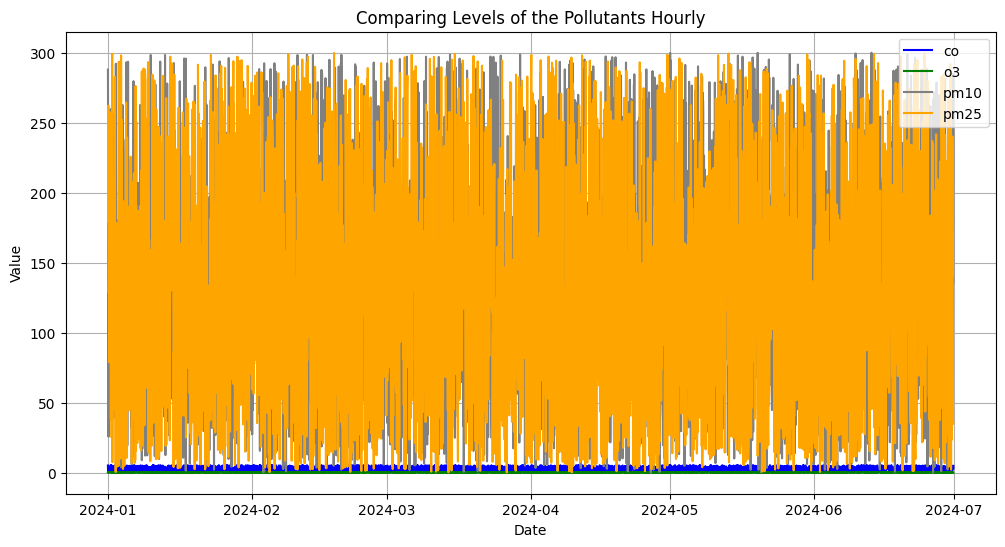

In [10]:
# comparing the level of each pollutant
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Tuen_aqi, x='datetimeUtc', y='AQI_co', label='co', color='blue')
sns.lineplot(data = Tuen_aqi, x='datetimeUtc', y='AQI_o3', label='o3', color='green')
sns.lineplot(data = Tuen_aqi, x='datetimeUtc', y='AQI_pm10', label='pm10', color='grey')
sns.lineplot(data = Tuen_aqi, x='datetimeUtc', y='AQI_pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Hourly')
plt.legend()
plt.grid(True)
plt.show()

Resampling to a daily format to get a clearer view for drawing conclusions.

### Comparing the AQI level of pollutants resampled daily

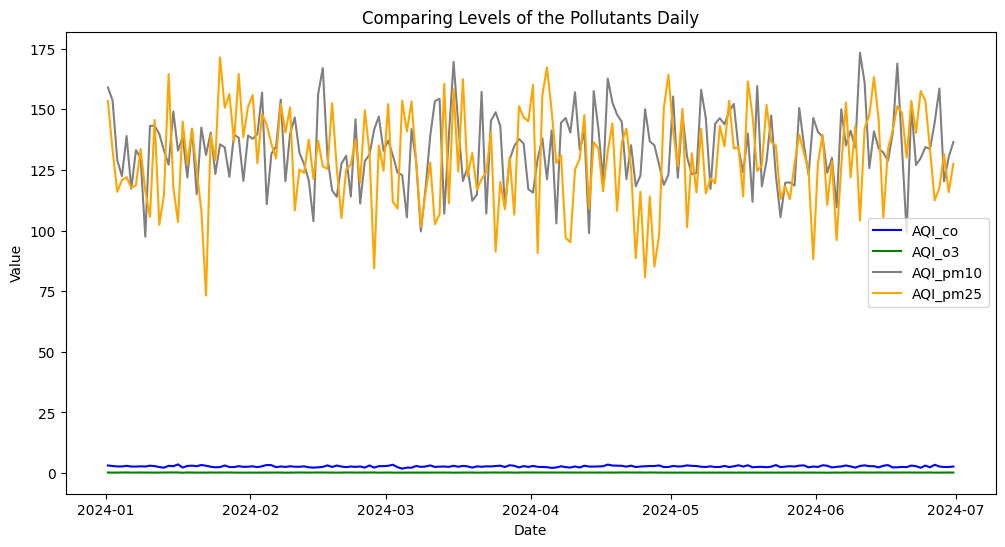

In [11]:
# Resampling the data to daily basis for a clearer view
Tuen_aqi_resampled_daily = Tuen_aqi.resample('D').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Tuen_aqi_resampled_daily, x='datetimeUtc', y='AQI_co', label='AQI_co', color='blue')
sns.lineplot(data = Tuen_aqi_resampled_daily, x='datetimeUtc', y='AQI_o3', label='AQI_o3', color='green')
sns.lineplot(data = Tuen_aqi_resampled_daily, x='datetimeUtc', y='AQI_pm10', label='AQI_pm10', color='grey')
sns.lineplot(data = Tuen_aqi_resampled_daily, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Daily')
plt.legend()
plt.show()

### Comparing AQI levels of pollutants resampled monthly

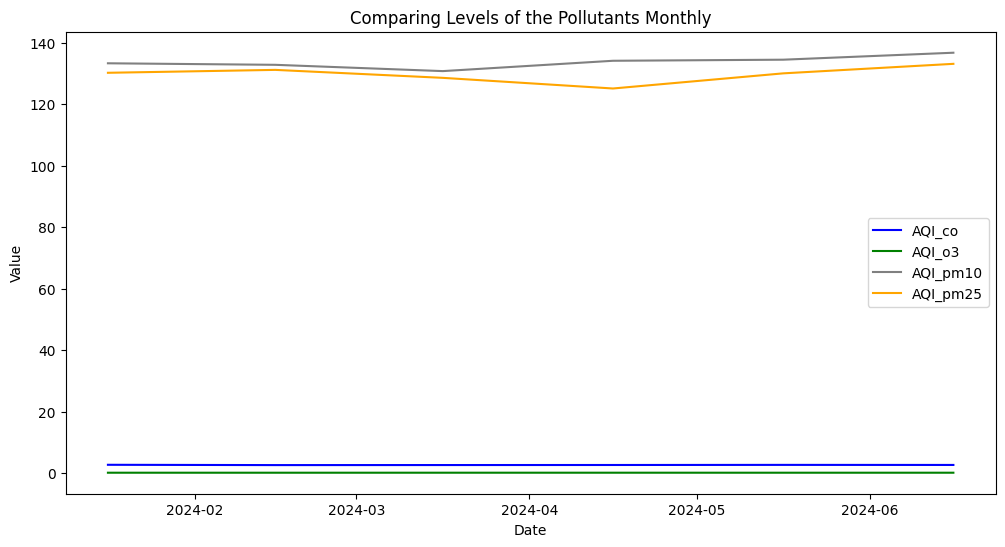

In [12]:
# resampling it to a monthly basis
Tuen_aqi_resampled_monthly = Tuen_aqi.resample('ME').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Tuen_aqi_resampled_monthly, x='datetimeUtc', y='AQI_co', label='AQI_co', color='blue')
sns.lineplot(data = Tuen_aqi_resampled_monthly, x='datetimeUtc', y='AQI_o3', label='AQI_o3', color='green')
sns.lineplot(data = Tuen_aqi_resampled_monthly, x='datetimeUtc', y='AQI_pm10', label='AQI_pm10', color='grey')
sns.lineplot(data = Tuen_aqi_resampled_monthly, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Monthly')
plt.legend()
plt.show()

The line chart indicates that PM10 and PM2.5 are the major pollutants in the air over the observed period, with PM10 levels being the highest and showing a slight increase. O3 and CO levels are very low and stable, suggesting minimal impact on air quality compared to particulate matter (PM10 and PM2.5). This trend suggests a need to focus on controlling particulate matter to improve air quality.

Detect Stationarity of o3
* Using ADF test
    * null hypothesis - A unit root is present in the timeseries indication that the series is not stationary for ozone
    * Alternate hypothesis - the series in stationary suggesting that the time series does not have a unit root

In [13]:
result = adfuller(Tuen_aqi['AQI_o3'])
# print out hte results
print('ADF Statistics:', result[0])
print('p-value', result[1])
print('Critical Value:', result[4]) # type: ignore

ADF Statistics: -65.19862494081495
p-value 0.0
Critical Value: {'1%': -3.431848316462996, '5%': -2.862202072737318, '10%': -2.567122425746128}


Since the p-value is less than the significance level of 0.05, we reject the null hypothesis, suggesting that the o3 level is likely to be stationary

### Correlation heatmap for the pollutants

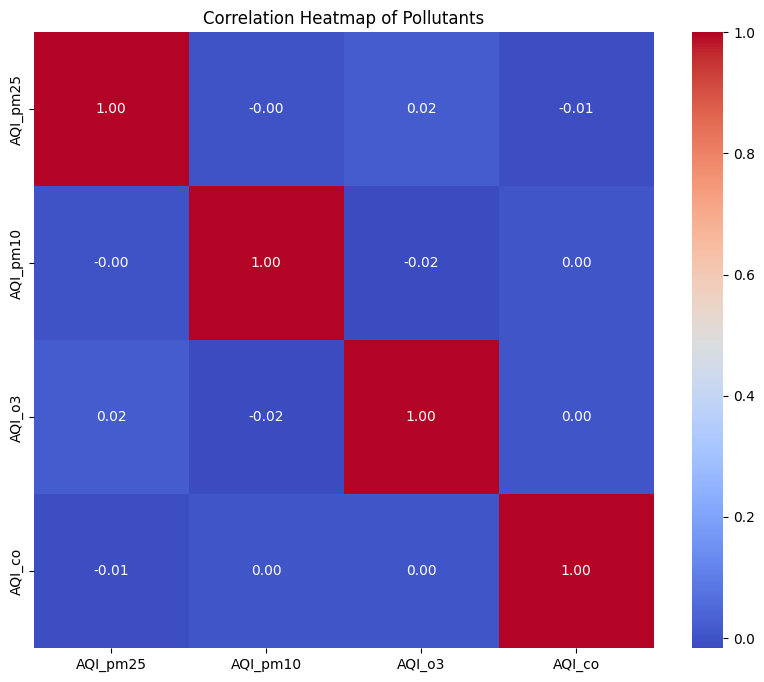

In [14]:
# correlation heatmap for the pollutants
# selecting the pollutants
pollutants = ['AQI_pm25', 'AQI_pm10', 'AQI_o3', 'AQI_co']

# calculating the correlation matrix
corr_matrix = Tuen_aqi[pollutants].corr()
# plotting a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt = '.2f')
plt.title('Correlation Heatmap of Pollutants')
plt.show()

* Each cell in the heatmap shoes the correlation coefficient between the pair of pollutants at the intersection of the corresponding  row and column.

* The color scale on the right ranges from blue to red.
Blue indicates low or negative correlation values.
Red indicates high positive correlation values.

* The diagonal elements are all 1, as each pollutant is perfectly correlated with itself.

These cells are all colored in red, indicating a perfect positive correlation.

* The off-diagonal elements show the correlations between different pairs of pollutants.

    * AQI_pm25 and Other Pollutants:
* AQI_pm25 and AQI_pm10: Correlation is -0.00, indicating no significant correlation.
* AQI_pm25 and AQI_o3: Correlation is -0.00, indicating no significant correlation.
* AQI_pm25 and AQI_co: Correlation is -0.00, indicating no significant correlation.
    * AQI_pm10 and Other Pollutants:
* AQI_pm10 and AQI_o3: Correlation is 0.02, indicating a very weak positive correlation.
* AQI_pm10 and AQI_co: Correlation is 0.00, indicating no significant correlation.
    * AQI_o3 and Other Pollutants:
* AQI_o3 and AQI_co: Correlation is 0.01, indicating a very weak positive correlation.

## A Lineplot for the AQI trends
* Here, we will create a lineplot to visualize the AQI trends for a six month time period.
* We will first visualize it hourly and then use the resampled format for daily for a clearer view.

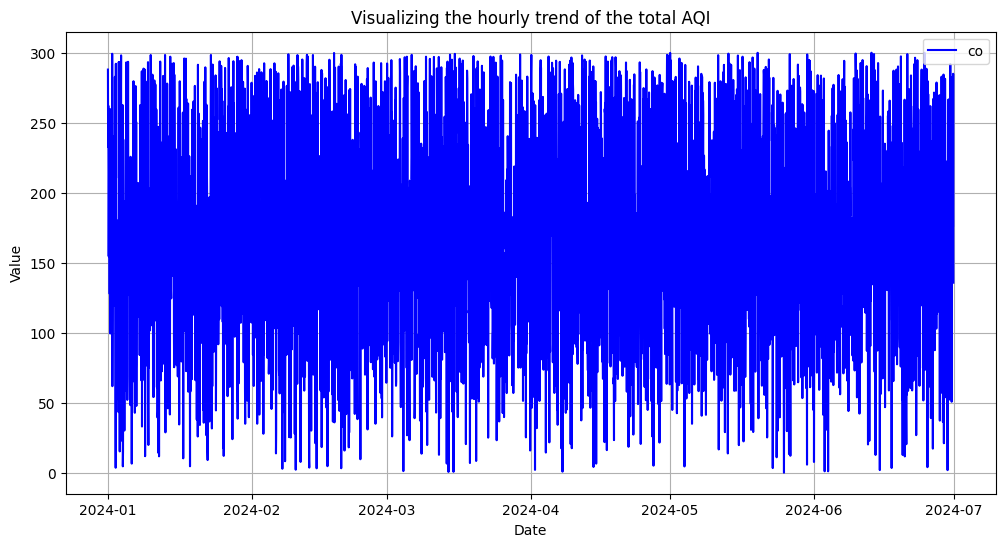

In [15]:
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Tuen_aqi, x='datetimeUtc', y='AQI', label='co', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the hourly trend of the total AQI')
plt.legend()
plt.grid(True)
plt.show()

Resampling the data to daily for a clearer view.

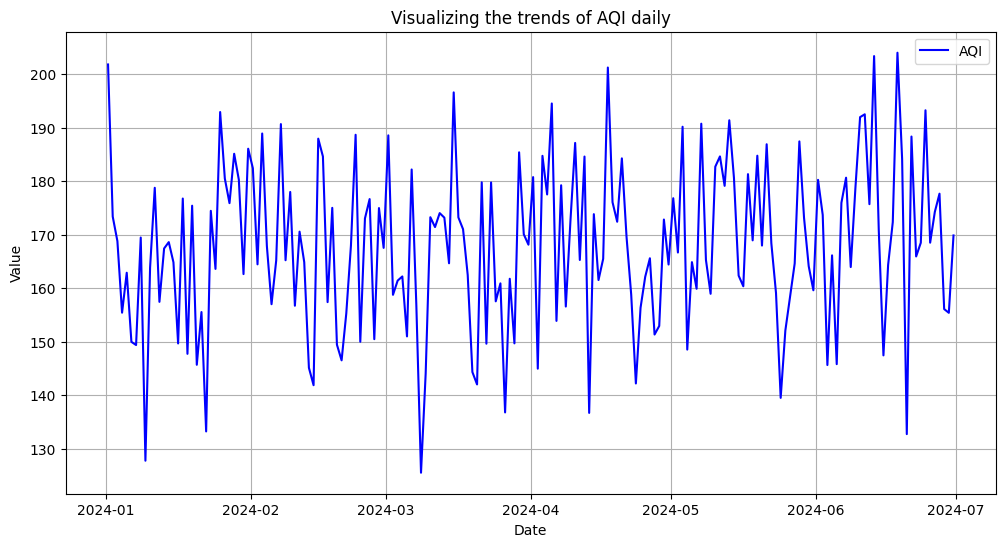

In [16]:
# comparing the level of each pollutant
# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = Tuen_aqi_resampled_daily, x='datetimeUtc', y='AQI', label='AQI', color='blue')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Visualizing the trends of AQI daily')
plt.legend()
plt.grid(True)
plt.show()

* The AQI levels fluctuate significantly over the observed period. There are noticeable peaks and troughs, indicating periods of higher and lower concentration.

## Detecting Seasonality using Additive Decomposition.
In this example, we will use the `additive_decomposition` function from the `statsmodels
The Additive decomposition separates the time series into trend, seasonal, and residual components assuming that the time series is equal to trend + seasonality + noise

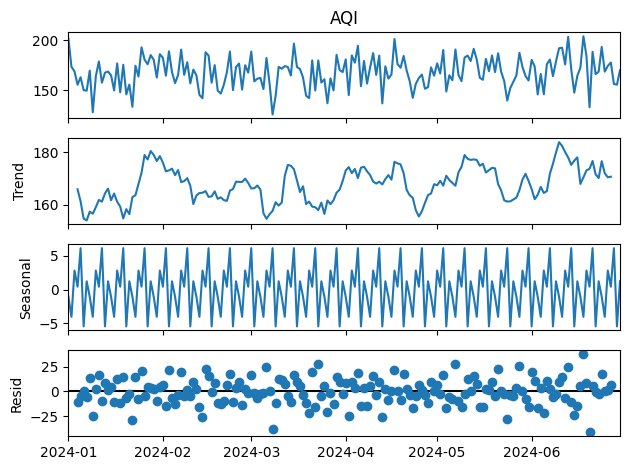

In [17]:
# checking for seasonality
result = seasonal_decompose(Tuen_aqi_resampled_daily['AQI'], model='additive')
result.plot()
plt.show()

Components of the Decomposition

1. **Observed (AQI)**: 
   - The top plot shows the original time series data of Air Quality Index (AQI). This is the raw data that includes all components: trend, seasonality, and noise.

2. **Trend**:
   - The second plot shows the trend component, which captures the long-term progression of the series. This smooth curve represents the underlying direction in which the data is moving over time. In this plot, the trend shows some fluctuations but generally follows a gradual upward and downward pattern.

3. **Seasonal**:
   - The third plot shows the seasonal component, which captures the repeating short-term cycles in the data. The periodic fluctuations suggest a strong seasonal pattern that repeats over a consistent period. In this case, it appears to have a clear, regular pattern indicating the presence of seasonality in the AQI data.

4. **Residuals (Resid)**:
   - The bottom plot shows the residual component, which represents the noise or irregularities in the data after removing the trend and seasonal components. These are the random variations that cannot be attributed to trend or seasonality. Ideally, the residuals should be randomly scattered around zero, indicating that the model has effectively captured the trend and seasonal components.

### Interpretation

- **Trend**: The trend component shows the underlying movement in the AQI data over time, indicating periods where the AQI is increasing or decreasing.
- **Seasonality**: The clear periodic pattern in the seasonal component confirms that there is a strong seasonal effect in the AQI data, repeating regularly within the observed period.
- **Residuals**: The residuals appear to be randomly distributed, which is a good indication that the model has appropriately separated out the trend and seasonal components.

### Conclusion

This decomposition analysis confirms the presence of both a trend and seasonality in the AQI data. The strong seasonal component suggests regular fluctuations at consistent intervals, while the trend indicates the overall direction of the AQI over time. The residuals suggest that the remaining variance is random noise, which is not explained by the trend or seasonality.

###  Creating Subplots for the Daily AQI Levels

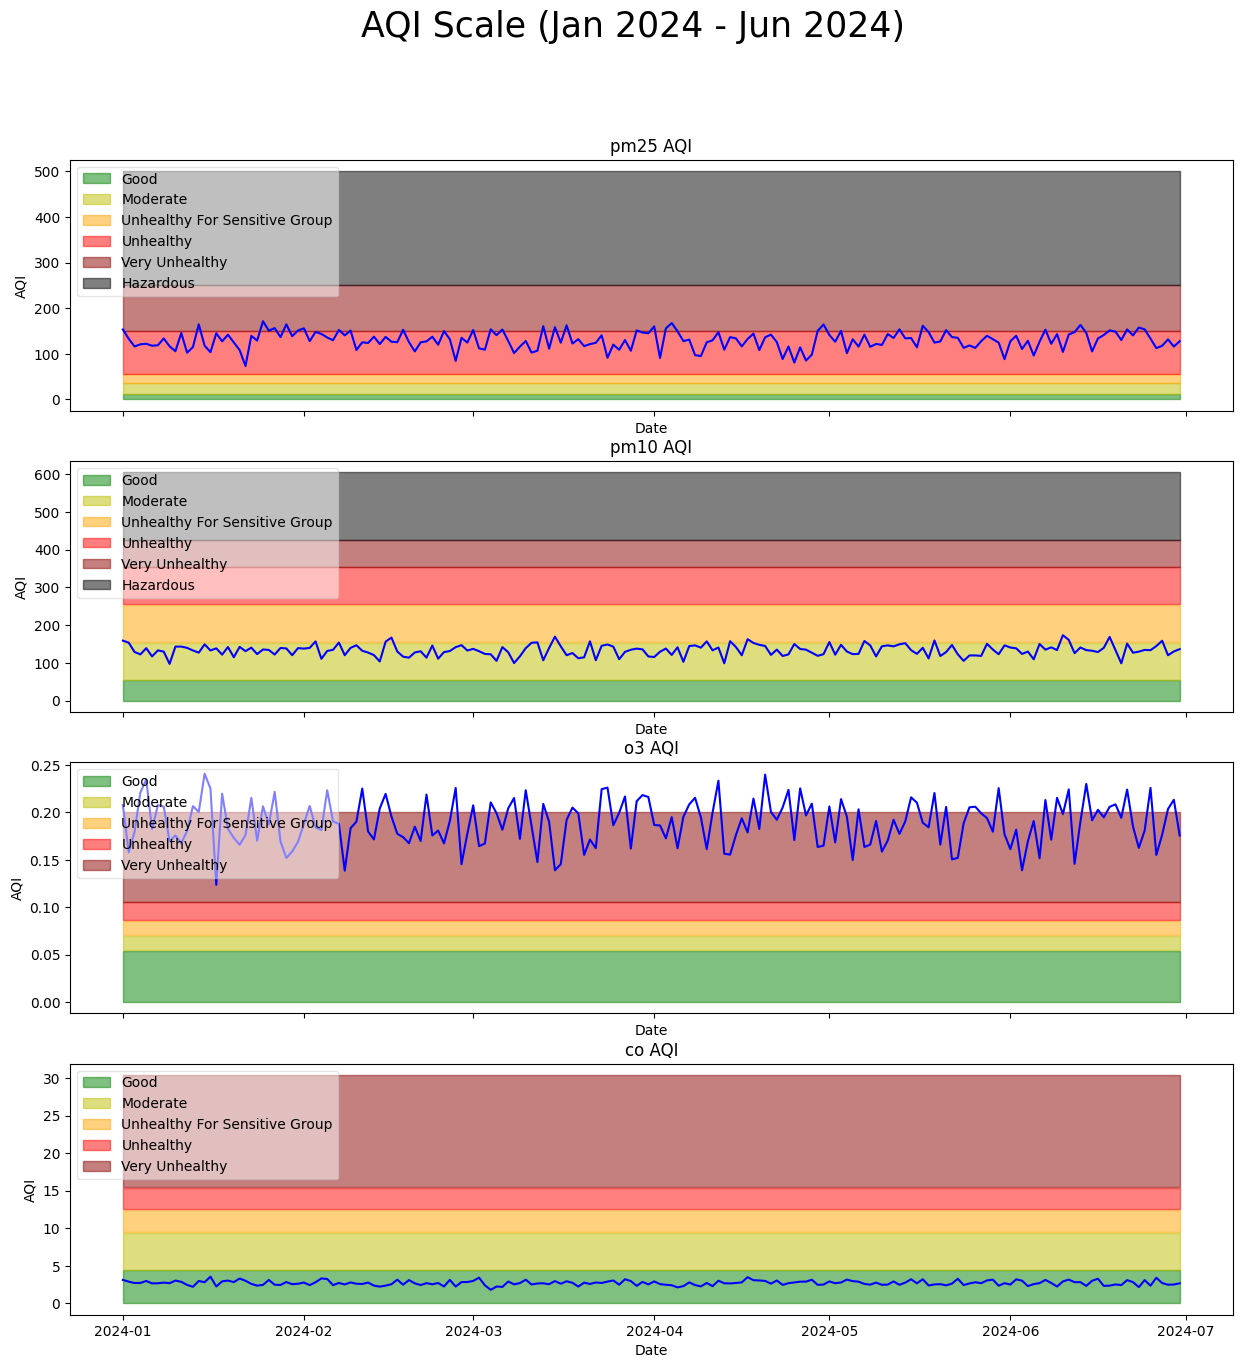

In [18]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 42.0, 0, 50), (42.1, 84.0, 51, 100), (84.1, 126.0, 101, 150), (126.1, 168.0, 151, 200), (168.1, 210.0, 201, 300)],
    'pm10': [(0.0, 54.0, 0, 50), (55.1, 154.0, 51, 100), (155.0, 254.0, 101, 150), (255.0, 354.0, 151, 200), (355.0, 424.0, 201, 300)],
    'o3': [(0.0, 26.67, 0, 50), (26.68, 53.33, 51, 100), (53.34, 80.0, 101, 150), (80.01, 106.67, 151, 200), (106.68, 133.33, 201, 300), (133.34, 160.0, 301, 500)],
    'co': [(0.0, 138.3, 0, 50), (138.4, 276.6, 51, 100), (276.7, 414.9, 101, 150), (415.0, 553.2, 151, 200), (553.3, 691.5, 201, 300), (691.6, 830.0, 301, 500)]
}

def index_scale(plotnumber, data, pollutant):
    if pollutant == 'pm25':
        scales = [(0, 12, 'Good', 'g'), (12.1, 35.4, 'Moderate', 'y'), (35.5, 55.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (55.5, 150.4, 'Unhealthy', 'r'), (150.5, 250.4, 'Very Unhealthy', 'darkred'), (250.5, 500.4, 'Hazardous', 'black')]
    elif pollutant == 'pm10':
        scales = [(0, 54, 'Good', 'g'), (55, 154, 'Moderate', 'y'), (155, 254, 'Unhealthy For Sensitive Group', 'orange'),
                  (255, 354, 'Unhealthy', 'r'), (355, 424, 'Very Unhealthy', 'darkred'), (425, 604, 'Hazardous', 'black')]
    elif pollutant == 'o3':
        scales = [(0.000, 0.054, 'Good', 'g'), (0.055, 0.070, 'Moderate', 'y'), (0.071, 0.085, 'Unhealthy For Sensitive Group', 'orange'),
                  (0.086, 0.105, 'Unhealthy', 'r'), (0.106, 0.200, 'Very Unhealthy', 'darkred')]
    elif pollutant == 'co':
        scales = [(0.0, 4.4, 'Good', 'g'), (4.5, 9.4, 'Moderate', 'y'), (9.5, 12.4, 'Unhealthy For Sensitive Group', 'orange'),
                  (12.5, 15.4, 'Unhealthy', 'r'), (15.5, 30.4, 'Very Unhealthy', 'darkred')]
    
    for scale in scales:
        axs[plotnumber].fill_between(x=data.index, y1=scale[0], y2=scale[1], alpha=0.5, label=scale[2], color=scale[3])
    axs[plotnumber].set_title(f'{pollutant} AQI')
    axs[plotnumber].legend(loc='upper left', framealpha=0.5)
    axs[plotnumber].set_xlabel('Date')
    axs[plotnumber].set_ylabel('AQI')

# Create subplots to visualize the AQI data from January to June 2024
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(15, 15))
fig.suptitle('AQI Scale (Jan 2024 - Jun 2024)', fontsize=25)
pollutants = ['pm25', 'pm10', 'o3', 'co']

for i, pollutant in enumerate(pollutants):
    axs[i].plot(Tuen_aqi_resampled_daily[f'AQI_{pollutant}'], color='blue')
    index_scale(i, Tuen_aqi_resampled_daily, pollutant)

plt.show()


* The AQI of pm25 fluctuates primarily within the Moderate to Unhealthy for Sensitive Groups range, with occasional peaks into the Unhealthy category.
* The blue line for PM10 AQI mostly stays within the Good to Moderate range, with occasional spikes into the Unhealthy for Sensitive Groups and Unhealthy categories.
* The O3 AQI line frequently enters the Unhealthy for Sensitive Groups and Unhealthy categories, indicating higher ozone levels during the period.
* The CO AQI remains consistently within the Good range, indicating low carbon monoxide levels.

### Comparing the Levels of the pollutant in Tuen Mun

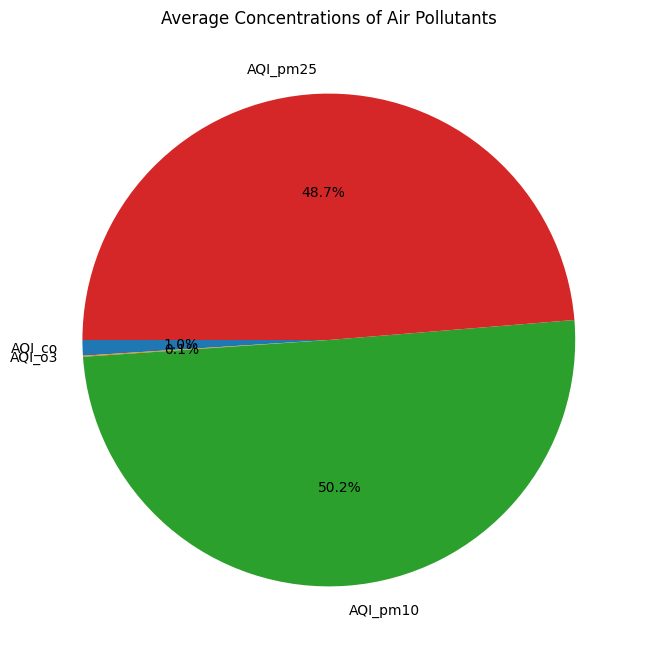

In [19]:
# creating a piechart to comare the levels of the pollutants

# Calculate average values
average_values = Tuen_aqi[['AQI_co', 'AQI_o3', 'AQI_pm10', 'AQI_pm25']].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(average_values, labels=average_values.index, autopct='%1.1f%%', startangle=180) # type: ignore
plt.title('Average Concentrations of Air Pollutants')
plt.show()
        

* The pie chart shows that PM10 (Particulate Matter 10 micrometers or less) and PM2.5 (Particulate Matter 2.5 micrometers or less) dominate the air quality data, together making up almost 99% of the total average concentrations.
PM10 has the highest average concentration at 50.1%, slightly higher than PM2.5 at 48.8%.
* The contributions from CO (Carbon Monoxide) and O3 (Ozone) are much smaller, at 0.1% and 1.0%, respectively.
* The chart highlights the predominance of particulate matter (PM10 and PM2.5) in the air quality measurements, which are crucial pollutants to monitor due to their significant health impacts.

## Generating a predictive model
This Model will follow the following steps:
1. **Feature Engineering**: Create lagged features for pollutants (`co_lag1`, `o3_lag1`, `pm10_lag1`, `pm25_lag1`).
2. **Dropping Missing Values**: Drop rows with missing values caused by the lagging process.
3. **Defining Features and Target**: Lagged pollutant values as features (X) and current pollutant values as the target (y).
4. **Data Splitting**: Split the data into training and testing sets.
5. **Model Training**: Train a linear regression model on the training data.
6. **Prediction and Evaluation**: Make predictions on the test set and calculate the Mean Squared Error (MSE).
7. **Scatter Plot**: Create a scatter plot to visualize the actual vs. predicted values for each pollutant levels, along with an ideal fit line (red).

Mean Squared Error: 243.74841910735128


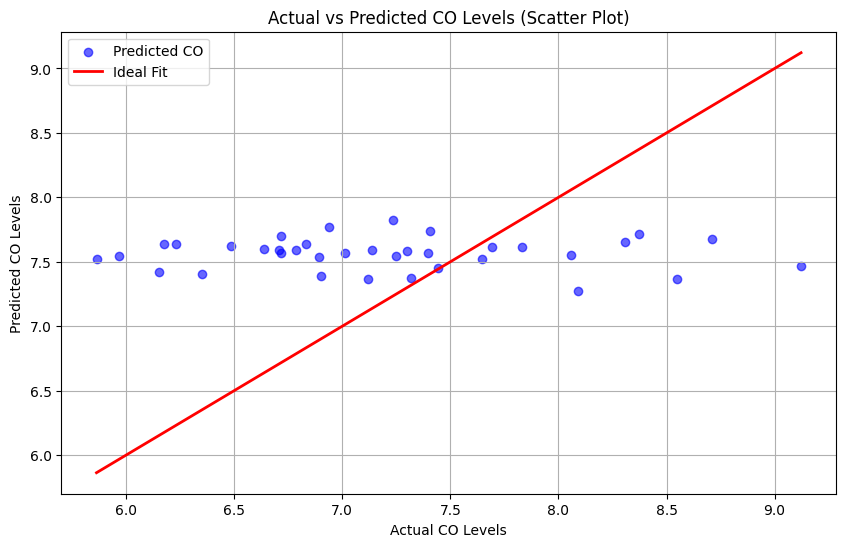

In [21]:
# Feature Engineering: Create lagged features
Tuen_aqi_resampled_daily['co_lag1'] = Tuen_aqi_resampled_daily['co'].shift(1)
Tuen_aqi_resampled_daily['o3_lag1'] = Tuen_aqi_resampled_daily['o3'].shift(1)
Tuen_aqi_resampled_daily['pm10_lag1'] = Tuen_aqi_resampled_daily['pm10'].shift(1)
Tuen_aqi_resampled_daily['pm25_lag1'] = Tuen_aqi_resampled_daily['pm25'].shift(1)

# Dropping rows with missing values due to lagging
Tuen_aqi_resampled_daily.dropna(inplace=True)

# Defining the features (x) and the target (y)
X = Tuen_aqi_resampled_daily[['co_lag1', 'o3_lag1', 'pm10_lag1', 'pm25_lag1']]
y = Tuen_aqi_resampled_daily[['co', 'o3', 'pm10', 'pm25']]

# Split the Tuen_aqi_resampled_daily into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values for CO with scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test['co'], y_pred[:, 0], color='blue', label='Predicted CO', alpha=0.6)
plt.plot([y_test['co'].min(), y_test['co'].max()], [y_test['co'].min(), y_test['co'].max()], color='red', lw=2, label='Ideal Fit')
plt.xlabel('Actual CO Levels')
plt.ylabel('Predicted CO Levels')
plt.title('Actual vs Predicted CO Levels (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()

`Blue Dots (Predicted CO Levels):`
* Each blue dot represents a predicted CO level plotted against its corresponding actual CO level.
* The x-axis represents the actual CO levels from the test set.
* The y-axis represents the predicted CO levels by the linear regression model.

`Red Line (Ideal Fit):`
* The red line represents the ideal fit, where the predicted values would exactly match the actual values.
* It has a slope of 1 and intercept of 0, indicating a perfect prediction scenario.

`Interpretation:`
        Distribution of Blue Dots:
* The blue dots show a general trend along the red line, which indicates that the predicted CO levels are somewhat aligned with the actual values.
* However, there is noticeable dispersion, especially for actual CO levels around 7.5, where predictions are more spread out.
* The red line follows a diagonal path from the origin and represents the perfect prediction scenario.
* The distance of blue dots from the red line indicates the prediction errors. The closer the dots to the red line, the better the predictions.

N/B: `This model is only used to predict the co levels since it was seen to perform moderately. I used it to predict the level of other pollutants and it was seen to perform poorly.`
